In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df_real = pd.read_csv(
    "../data/train_small_cleaned.csv",
)

In [3]:
df_synthetic = pd.read_csv(
    "../data/train_small_synthetic_cleaned.csv",
)

In [4]:
df_real = df_real.sample(df_synthetic.shape[0])

In [5]:
df_real.shape, df_synthetic.shape

((157206, 8), (157206, 7))

In [6]:
df_real.sample(5)

,TRIP_ID,TIMESTAMP,TRIP_DURATION,TRIP_LENGTH,TRIP_DISTANCE,START_POSITION,END_POSITION,POLYLINE
7323,1380324300620000406,1380324300,480,32,2336.932233,"(41.171022, -8.607384)","(41.155587, -8.602641)","[(41.171022, -8.607384), (41.171004, -8.607456..."
126176,1383066722620000252,1383066722,645,43,2003.044282,"(41.160357, -8.609562)","(41.176449, -8.613738)","[(41.160357, -8.609562), (41.160339, -8.609571..."
82249,1387691311620000239,1387691311,525,35,5751.048716,"(41.149386, -8.611146)","(41.185224, -8.581743)","[(41.149386, -8.611146), (41.149242, -8.610993..."
111031,1391115081620000651,1391115081,960,64,9675.923475,"(41.148594, -8.585694)","(41.18229, -8.623458)","[(41.148594, -8.585694), (41.148729, -8.585748..."
18415,1400990400620000195,1400990400,435,29,2770.818524,"(41.134464, -8.603514)","(41.147865, -8.604495)","[(41.134464, -8.603514), (41.134644, -8.60436)..."


In [7]:
df_synthetic.sample(5)

,TRIP_ID,TRIP_DURATION,TRIP_LENGTH,TRIP_DISTANCE,START_POSITION,END_POSITION,POLYLINE
91369,1380561803620000681_augm,690,46,2094.954531,"(41.150414, -8.606874)","(41.141351, -8.613311)","[(41.150414, -8.606874), (41.150378, -8.607147..."
91662,1401736932620000446_augm,1230,82,13050.880448,"(41.180685, -8.582628)","(41.160678, -8.680129)","[(41.180685, -8.582628), (41.180183, -8.582227..."
64233,1380124515620000216_augm,840,56,3092.858028,"(41.147993, -8.619649)","(41.169188, -8.621873)","[(41.147993, -8.619649), (41.148042, -8.619722..."
109834,1377902035620000171_augm,690,46,5062.702221,"(41.146027, -8.617551)","(41.144224, -8.64113)","[(41.146027, -8.617551), (41.146075, -8.61762)..."
129111,1404079573620000015_augm,765,51,4856.115520,"(41.149098, -8.599267)","(41.136226, -8.625979)","[(41.149098, -8.599267), (41.148939, -8.599288..."


In [8]:
df_real_data = df_real.copy()
df_real_data = df_real_data[['START_POSITION', 'END_POSITION', 'TRIP_DURATION']]
df_real_data['START_POSITION_LATITUDE'] = df_real_data['START_POSITION'].apply(lambda x: float(eval(x)[0]))
df_real_data['START_POSITION_LONGITUDE'] = df_real_data['START_POSITION'].apply(lambda x: float(eval(x)[1]))
df_real_data['END_POSITION_LATITUDE'] = df_real_data['END_POSITION'].apply(lambda x: float(eval(x)[0]))
df_real_data['END_POSITION_LONGITUDE'] = df_real_data['END_POSITION'].apply(lambda x: float(eval(x)[1]))
df_real_data = df_real_data.drop(columns=['START_POSITION', 'END_POSITION'])

df_synthetic_data = df_synthetic.copy()
df_synthetic_data = df_synthetic_data[['START_POSITION', 'END_POSITION', 'TRIP_DURATION']]
df_synthetic_data['START_POSITION_LATITUDE'] = df_synthetic_data['START_POSITION'].apply(lambda x: float(eval(x)[0]))
df_synthetic_data['START_POSITION_LONGITUDE'] = df_synthetic_data['START_POSITION'].apply(lambda x: float(eval(x)[1]))
df_synthetic_data['END_POSITION_LATITUDE'] = df_synthetic_data['END_POSITION'].apply(lambda x: float(eval(x)[0]))
df_synthetic_data['END_POSITION_LONGITUDE'] = df_synthetic_data['END_POSITION'].apply(lambda x: float(eval(x)[1]))
df_synthetic_data = df_synthetic_data.drop(columns=['START_POSITION', 'END_POSITION'])                                                                                    
                                                                                     

In [9]:
df_real_data['DELTA_LATITUDE'] = df_real_data['END_POSITION_LATITUDE'] - df_real_data['START_POSITION_LATITUDE']
df_real_data['DELTA_LONGITUDE'] = df_real_data['END_POSITION_LONGITUDE'] - df_real_data['START_POSITION_LONGITUDE']

df_synthetic_data['DELTA_LATITUDE'] = df_synthetic_data['END_POSITION_LATITUDE'] - df_synthetic_data['START_POSITION_LATITUDE']
df_synthetic_data['DELTA_LONGITUDE'] = df_synthetic_data['END_POSITION_LONGITUDE'] - df_synthetic_data['START_POSITION_LONGITUDE']

In [10]:
# Trip duration from seconds to minutes
df_real_data['TRIP_DURATION'] = df_real_data['TRIP_DURATION'] / 60
df_synthetic_data['TRIP_DURATION'] = df_synthetic_data['TRIP_DURATION'] / 60

In [11]:
df_real_data = df_real_data.sample(frac=0.5)
df_synthetic_data = df_synthetic_data.sample(frac=0.5)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [13]:
# Split data into training and testing

X_real = df_real_data.drop(columns=['TRIP_DURATION'])
y_real = df_real_data['TRIP_DURATION']

X_synthetic = df_synthetic_data.drop(columns=['TRIP_DURATION'])
y_synthetic = df_synthetic_data['TRIP_DURATION']

X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

X_real_train.shape, X_real_test.shape, y_real_train.shape, y_real_test.shape

((62882, 6), (15721, 6), (62882,), (15721,))

In [14]:
# Train a Support Vector Regressor
model_svm_real = SVR()
model_svm_real.fit(X_real_train, y_real_train)

model_svm_synthetic = SVR()
model_svm_synthetic.fit(X_synthetic_train, y_synthetic_train)

SVR()

In [15]:
# Train a KNN Regressor
model_knn_real = KNeighborsRegressor()
model_knn_real.fit(X_real_train, y_real_train)

model_knn_synthetic = KNeighborsRegressor()
model_knn_synthetic.fit(X_synthetic_train, y_synthetic_train)

KNeighborsRegressor()

In [16]:
# Train a Random Forest Regressor
model_rf_real = RandomForestRegressor()
model_rf_real.fit(X_real_train, y_real_train)

model_rf_synthetic = RandomForestRegressor()
model_rf_synthetic.fit(X_synthetic_train, y_synthetic_train)

RandomForestRegressor()

In [17]:
# Train a Linear Regression
model_lr_real = LinearRegression()
model_lr_real.fit(X_real_train, y_real_train)

model_lr_synthetic = LinearRegression()
model_lr_synthetic.fit(X_synthetic_train, y_synthetic_train)

LinearRegression()

In [18]:
# Train a Gradient Boosting Regressor
model_gb_real = GradientBoostingRegressor()
model_gb_real.fit(X_real_train, y_real_train)

model_gb_synthetic = GradientBoostingRegressor()
model_gb_synthetic.fit(X_synthetic_train, y_synthetic_train)

GradientBoostingRegressor()

In [19]:
# Evaluate the both models on the real data test set
y_real_pred_knn = model_knn_real.predict(X_real_test)
mse_knn_real = mean_absolute_error(y_real_test, y_real_pred_knn)
y_synthetic_pred_knn = model_knn_synthetic.predict(X_synthetic_test)
mse_knn_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_knn)

In [20]:
y_real_pred_lr = model_lr_real.predict(X_real_test)
mse_lr_real = mean_absolute_error(y_real_test, y_real_pred_lr)
y_synthetic_pred_lr = model_lr_synthetic.predict(X_synthetic_test)
mse_lr_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_lr)

In [21]:
y_real_pred_gb = model_gb_real.predict(X_real_test)
mse_gb_real = mean_absolute_error(y_real_test, y_real_pred_gb)
y_synthetic_pred_gb = model_gb_synthetic.predict(X_synthetic_test)
mse_gb_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_gb)

In [22]:
y_real_pred_rf = model_rf_real.predict(X_real_test)
mse_rf_real = mean_absolute_error(y_real_test, y_real_pred_rf)
y_synthetic_pred_rf = model_rf_synthetic.predict(X_synthetic_test)
mse_rf_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_rf)

In [23]:
y_real_pred_svm = model_svm_real.predict(X_real_test)
mse_svm_real = mean_absolute_error(y_real_test, y_real_pred_svm)
y_synthetic_pred_svm = model_svm_synthetic.predict(X_synthetic_test)
mse_svm_synthetic = mean_absolute_error(y_synthetic_test, y_synthetic_pred_svm)

In [24]:
# Create a DataFrame to compare the models
df_results = pd.DataFrame({
    'Model': ['KNN', 'LR', 'GB', 'RF', 'SVM'],
    'Real': [mse_knn_real, mse_lr_real, mse_gb_real, mse_rf_real, mse_svm_real],
    'Synthetic': [mse_knn_synthetic, mse_lr_synthetic, mse_gb_synthetic, mse_rf_synthetic, mse_svm_synthetic]
})

df_results.sort_values(by='Real', ascending=False, inplace=True)

In [25]:
df_results

,Model,Real,Synthetic
1,LR,4.916479,5.002919
4,SVM,4.869587,4.896357
2,GB,3.994023,4.079958
0,KNN,3.941823,4.025816
3,RF,3.834536,3.932574


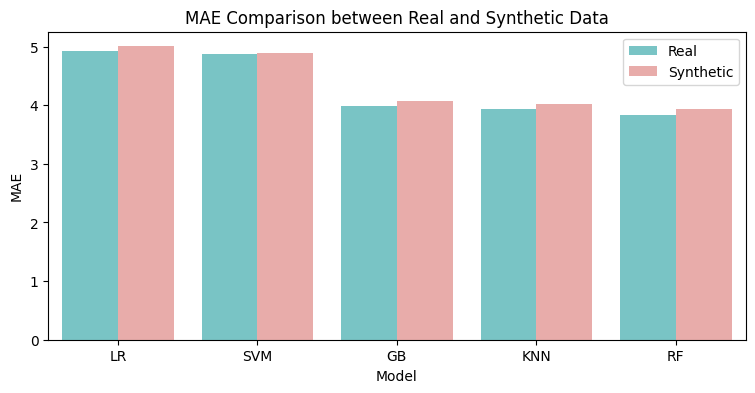

In [36]:
# Plot the results
df_results_plot = df_results.melt(id_vars='Model', var_name='Data', value_name='MAE')

fig, ax = plt.subplots(figsize=(9, 4))
plt.title('MAE Comparison between Real and Synthetic Data')
sns.barplot(x='Model', y='MAE', hue='Data', data=df_results_plot, palette=['#6CD1D2', '#F3A29F'], ax=ax)
plt.legend(title='')
plt.show()